# Домашняя работа №1

# Задача №1

    Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара:  P0= 5, 10, 15, 20 MPa. Для каждого значения взять следующие значения температуры  t0= 300, 350, 400, 450, 500 градусов Цельсия,  Pk= 5 kPa. Принять давление за последней ступенью паровой турбины  P2=Pk . Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.

In [1]:
    import iapws
    from iapws import IAPWS97 as gas
    import matplotlib.pyplot as plt
    import numpy as np

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [3]:
# Начальные параметры:
p0_1 = 5 * MPa
p0_2 = 10 * MPa
p0_3 = 15 * MPa
p0_4 = 20 * MPa

t0_1 = to_kelvin(300)
t0_2 = to_kelvin(350)
t0_3 = to_kelvin(400)
t0_4 = to_kelvin(450)

pk = 5 * kPa

In [4]:
# Определим точки, которые нам нужны

point_0_1 = gas(P=p0_1 * unit, T=t0_1)
point_condenser_inlet_1 = gas(P=pk * unit, s=point_0_1.s) # Первая точка
point_pump_outlet_1 = gas(P=pk * unit, x=0)

point_0_2 = gas(P=p0_2 * unit, T=t0_2)
point_condenser_inlet_2 = gas(P=pk * unit, s=point_0_2.s) # Вторая точка
point_pump_outlet_2 = gas(P=pk * unit, x=0)

point_0_3 = gas(P=p0_3 * unit, T=t0_3)
point_condenser_inlet_3 = gas(P=pk * unit, s=point_0_3.s) # Третья точка
point_pump_outlet_3 = gas(P=pk * unit, x=0)

point_0_4 = gas(P=p0_4 * unit, T=t0_4)
point_condenser_inlet_4 = gas(P=pk * unit, s=point_0_4.s) # Четвертая точка
point_pump_outlet_4 = gas(P=pk * unit, x=0)

In [5]:
useful_energy1 = point_0_1.h - point_condenser_inlet_1.h
full_energy1 = point_0_1.h - point_pump_outlet_1.h
efficiency1 = useful_energy1 / full_energy1

useful_energy2 = point_0_2.h - point_condenser_inlet_2.h
full_energy2 = point_0_2.h - point_pump_outlet_2.h
efficiency2 = useful_energy2 / full_energy2

useful_energy3 = point_0_3.h - point_condenser_inlet_3.h
full_energy3 = point_0_3.h - point_pump_outlet_3.h
efficiency3 = useful_energy3 / full_energy3

useful_energy4 = point_0_4.h - point_condenser_inlet_4.h
full_energy4 = point_0_4.h - point_pump_outlet_4.h
efficiency4 = useful_energy4 / full_energy4


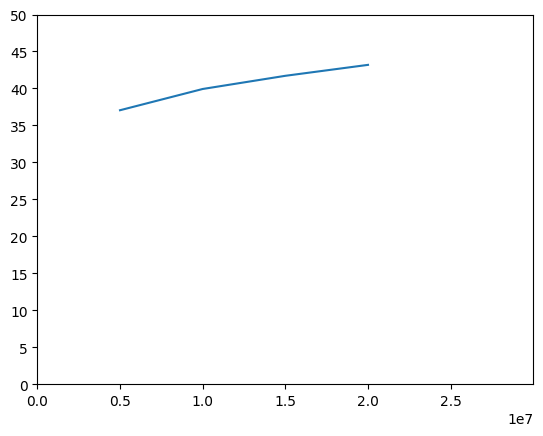

In [6]:
y = (round(efficiency1 * 100, 3), round(efficiency2 * 100, 3), round(efficiency3 * 100, 3), round(efficiency4 * 100, 3))
x = (p0_1, p0_2, p0_3, p0_4)
fig, ax = plt.subplots()

ax.plot(x, y,)

ax.set(xlim=(0 , 30 * MPa), xticks = np.arange(0, 30 * MPa, 5  * MPa, ),
        ylim=(0, 50), yticks = np.arange(0, 55, 5,))

plt.show()

In [7]:
print("Значение КПД в точке 1:", round(efficiency1 * 100, 3), "%")
print("Значение КПД в точке 2:", round(efficiency2 * 100, 3), "%")
print("Значение КПД в точке 3:", round(efficiency3 * 100, 3), "%")
print("Значение КПД в точке 4:", round(efficiency4 * 100, 3), "%")

Значение КПД в точке 1: 37.05 %
Значение КПД в точке 2: 39.925 %
Значение КПД в точке 3: 41.708 %
Значение КПД в точке 4: 43.188 %


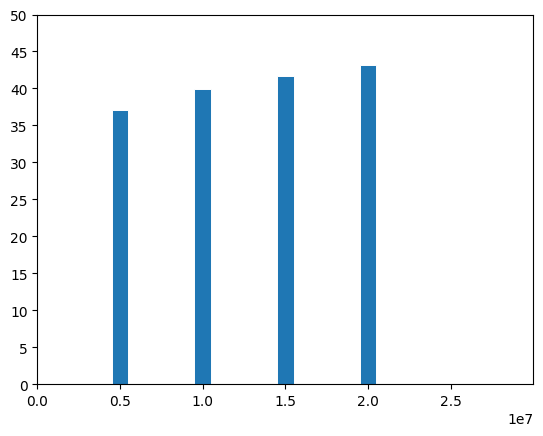

In [8]:
np.random.seed(3)
y = (round(efficiency1 * 100, 3), round(efficiency2 * 100, 3), round(efficiency3 * 100, 3), round(efficiency4 * 100, 3))
x = (p0_1, p0_2, p0_3, p0_4)

fig, ax = plt.subplots()

ax.bar(x, y, width=1 * MPa, edgecolor="white", linewidth=0.7)

ax.set(xlim = (0 , 30 * MPa), xticks = np.arange(0, 30 * MPa, 5  * MPa, ),
        ylim = (0, 50), yticks = np.arange(0, 55, 5,))

plt.show()